<a href="https://colab.research.google.com/github/dynhi/MachineLearning/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
# load dataset Iris.csv 
# https://www.kaggle.com/uciml/iris
# dataset = pd.read_csv('/content/drive/My Drive/Lab 6/Iris.csv')
dataset = pd.read_csv('/content/drive/My Drive/Lab 6/diabetes.csv')

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
# get how many instances (rows) and how many attributes (columns)

dataset.shape

#show BASIC INFORMATION: max, min, mean của các columns trong dataset

dataset.describe()

#SHOW ALLS

dataset.describe(include = 'all')
# SHOW THE FIRST COLUOMS
dataset.head(5)

# SHOW THE FEW LAST COLOUMS

dataset.tail(3)
# T number of instances (rows) that belong to each class. 
dataset.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [0]:
### Visualization
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


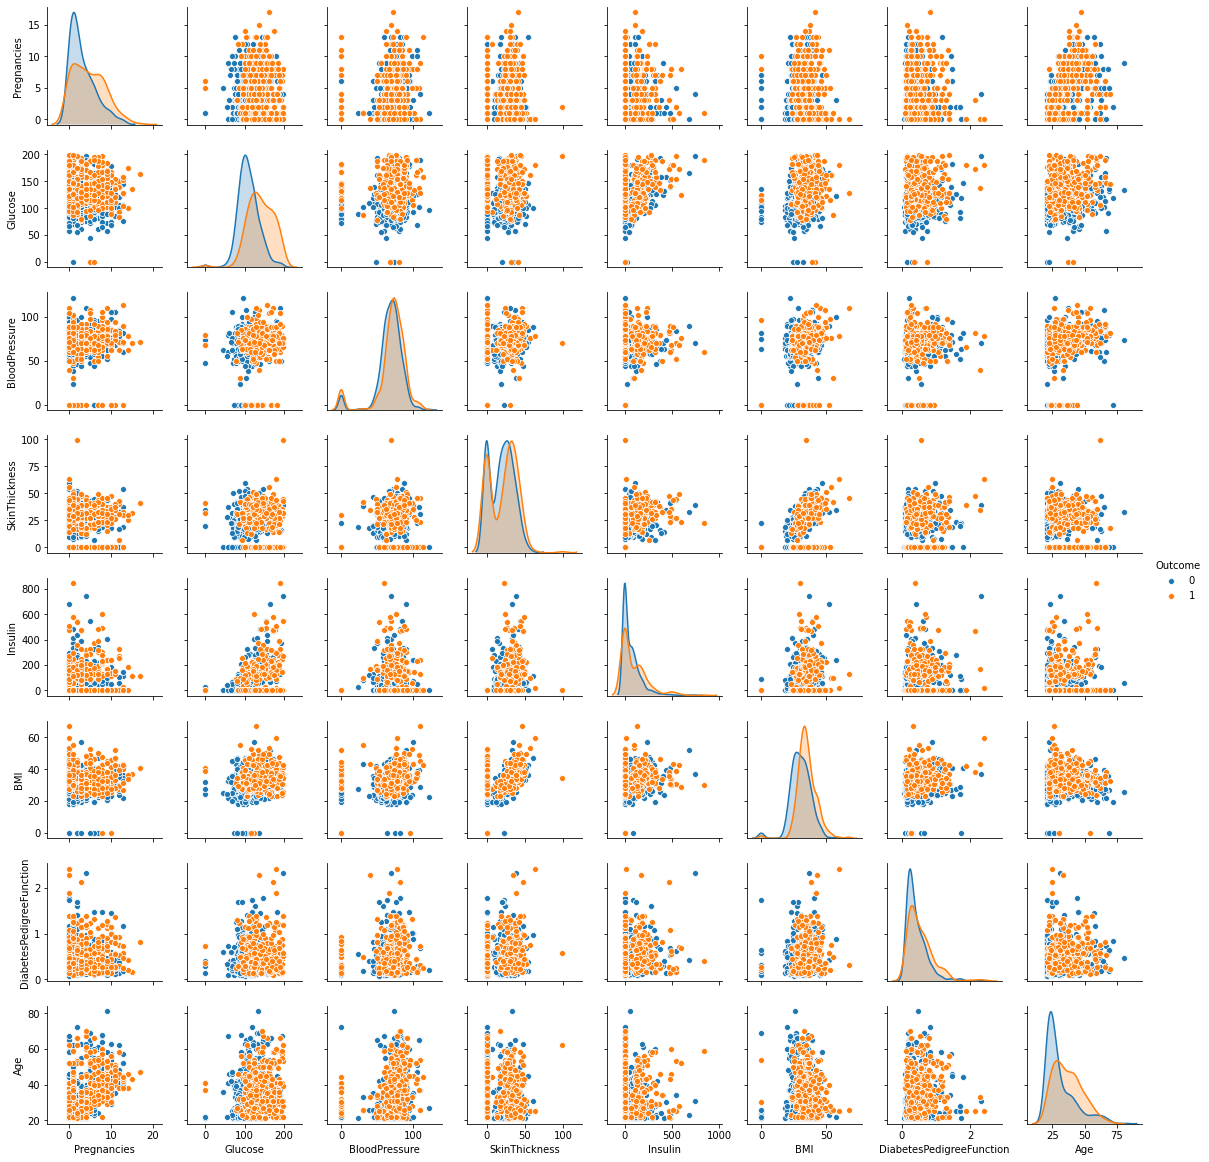

In [75]:
#PAIRPLOT
# sns.pairplot(dataset.drop("Id", axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
sns.pairplot(data=dataset, hue = "Outcome", size=2)
plt.show()

<Figure size 432x288 with 0 Axes>

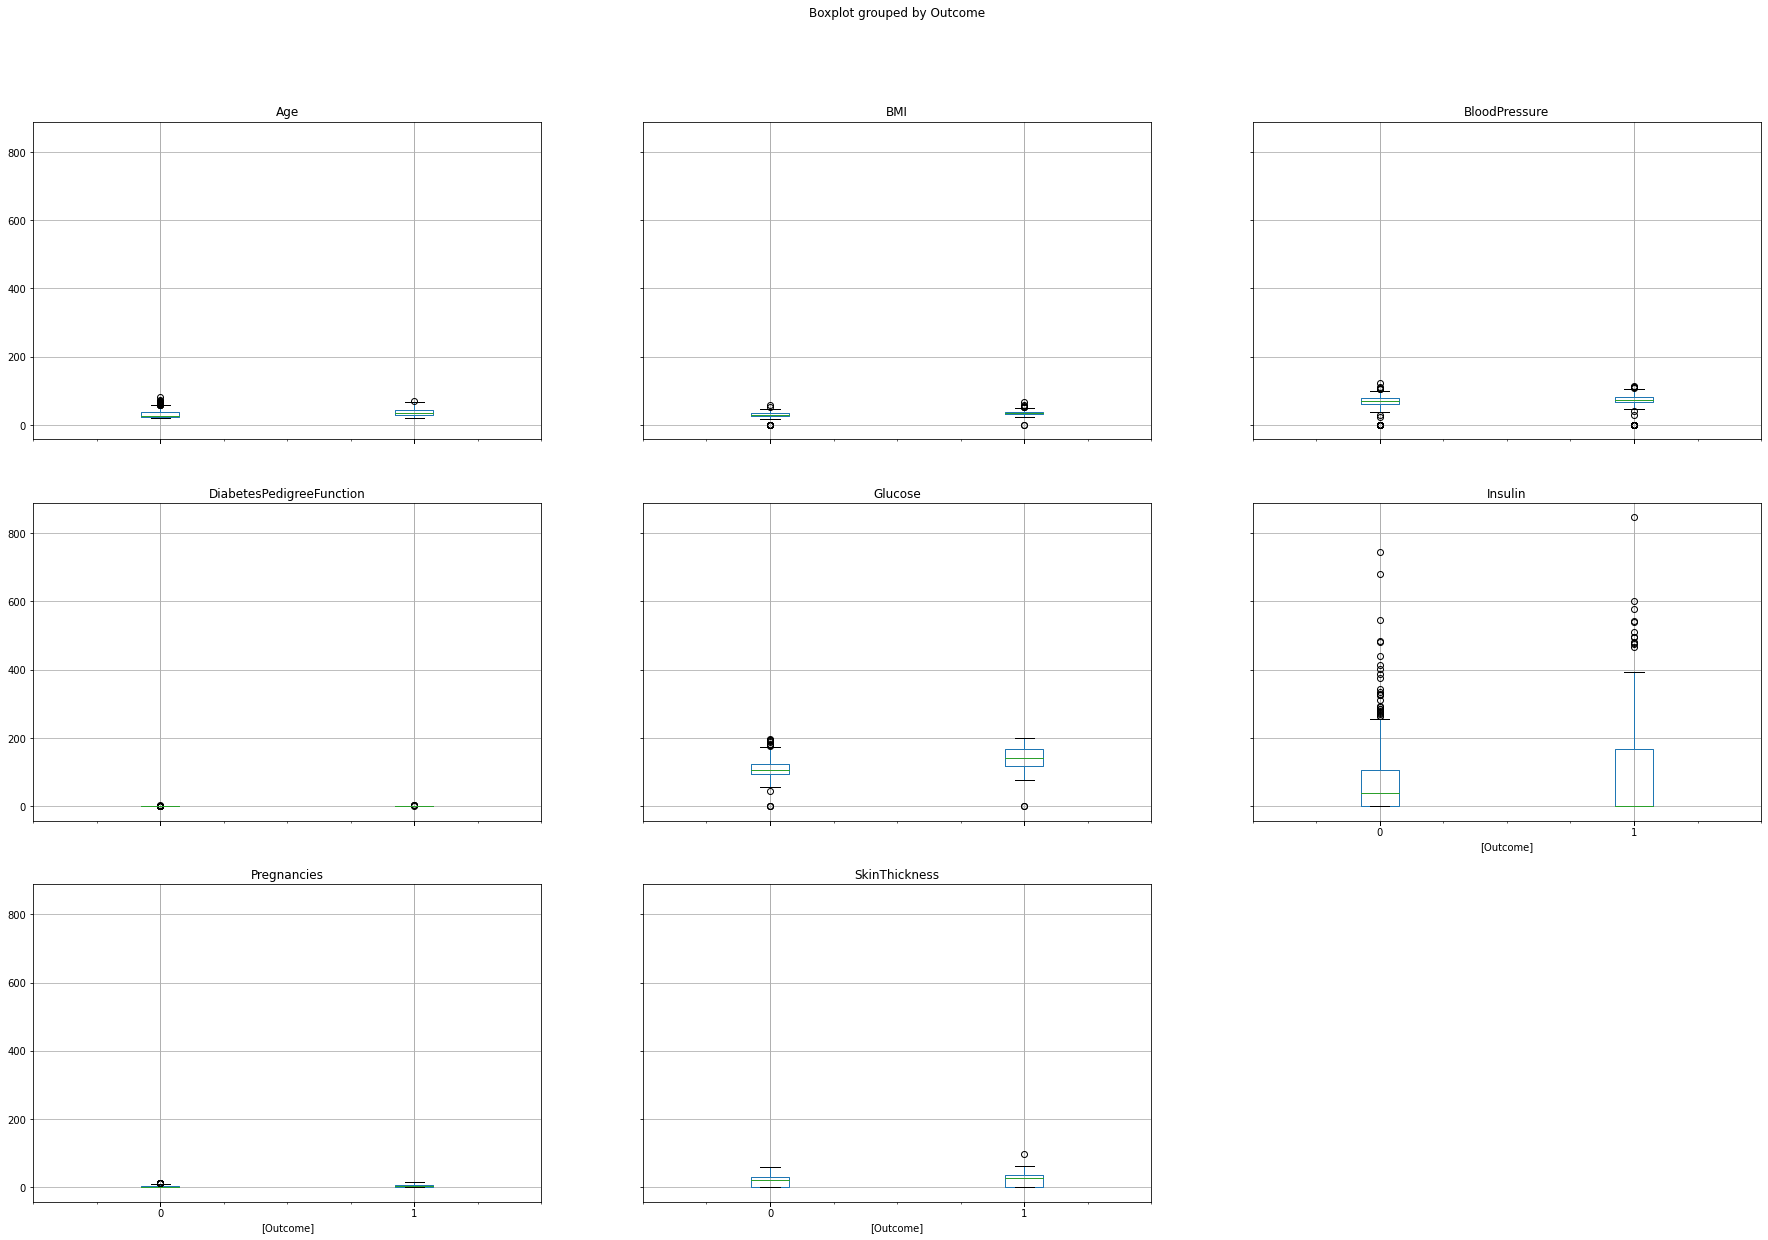

In [76]:
plt.figure()
# dataset.drop("Id", axis=1).boxplot(by="Species", figsize=(30, 20))
dataset.boxplot(by="Outcome", figsize=(30, 20))
plt.show()

In [0]:
### % 2: Data preprocessing

# determine features and labels
# option 1
# feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
feature_columns = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = dataset[feature_columns].values
y = dataset['Outcome'].values

#option 2
# X = dataset.iloc[:, 1:5].values
# y = dataset.iloc[:, 5].values

In [0]:
# Species (label) là categorical variables. Do đó chúng ta phải chuyển đổi Species thành số trước khi đưa vào cho KNeighborsClassifier does not accept string labels

# Iris-setosa correspond to 0
# Iris-versicolor correspond to 1
# Iris-virginica correspond to 2
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
yl = le.fit_transform(y)

In [79]:
#Spliting dataset into training set and test set
# training set: to build classifier
# test set: to evaluate classifier  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, yl, test_size = 0.2, random_state = 0)
X_train.shape #120 rows dùng để train(80%)
y_train.shape
X_test.shape #30 rows dùng để test (20%)
y_test.shape

(154,)

In [0]:
# Using KNN 
# build model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [0]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

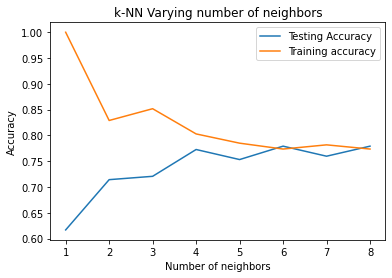

In [82]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show() 

In [83]:
# model (k = 1)
classifier = KNeighborsClassifier(n_neighbors=1)

# Fitting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [84]:
# Predicting on the test set
y_pred = classifier.predict(X_test)
y_pred

#% Evaluating the model for the test set

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [85]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[74, 33],
       [26, 21]])

In [86]:
#Option 1
#Sử dụng hàm accuracy_score
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 61.69 %.


In [92]:
# Option 2
acccuracy_byhand = (74+21)/(74+21+33+26)
acccuracy_byhand

0.6168831168831169

In [88]:
#Option 3
knn.score(X_test, y_test)

0.7792207792207793